# Chapter 13 Lab - Multiple Testing

## Bonferroni and Holm

In [1]:
# simulate random data for hypothesis testing

set.seed(6)
x <- matrix(rnorm(10 * 100), nrow = 10, ncol = 100) # 100 hypothesis tests: each colmean = 0
x[, 1:50] = x[, 1:50] + 0.5 # make mean of first 50 columns = 0.5; keep mean of rest 0
t.test(x[, 1], mu = 0) # hypothesis test on first column


	One Sample t-test

data:  x[, 1]
t = 2.0841, df = 9, p-value = 0.06682
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.05171076  1.26242719
sample estimates:
mean of x 
0.6053582 


- incorrectly failed to reject the null hypothesis! (assuming p-value cutoff of 0.05)

In [2]:
# t-test on all 100 columns

p_values <- rep(0, 100) # initialize vector of 100 zeroes

for (i in 1:100)
    p_values[i] <- t.test(x[, i], mu = 0)$p.value

# make decision table

decision <- rep('Do not reject H0', 100)
decision[p_values <= 0.05] <- 'Reject H0'

table(decision, 
      c(rep('H0 is False', 50), rep('H0 is True', 50)))

                  
decision           H0 is False H0 is True
  Do not reject H0          40         47
  Reject H0                 10          3

- 3 Type I errors
- 40 Type II errors

In [3]:
# repeat above with greater difference in means

x <- matrix(rnorm(10 * 100), nrow = 10, ncol = 100) # 100 hypothesis tests: each colmean = 0
x[, 1:50] = x[, 1:50] + 1 # make mean of first 50 columns = 1; keep mean of rest 0

p_values <- rep(0, 100) # initialize vector of 100 zeroes

for (i in 1:100)
    p_values[i] <- t.test(x[, i], mu = 0)$p.value

# make decision table

decision <- rep('Do not reject H0', 100)
decision[p_values <= 0.05] <- 'Reject H0'

table(decision, 
      c(rep('H0 is False', 50), rep('H0 is True', 50)))

                  
decision           H0 is False H0 is True
  Do not reject H0           9         49
  Reject H0                 41          1

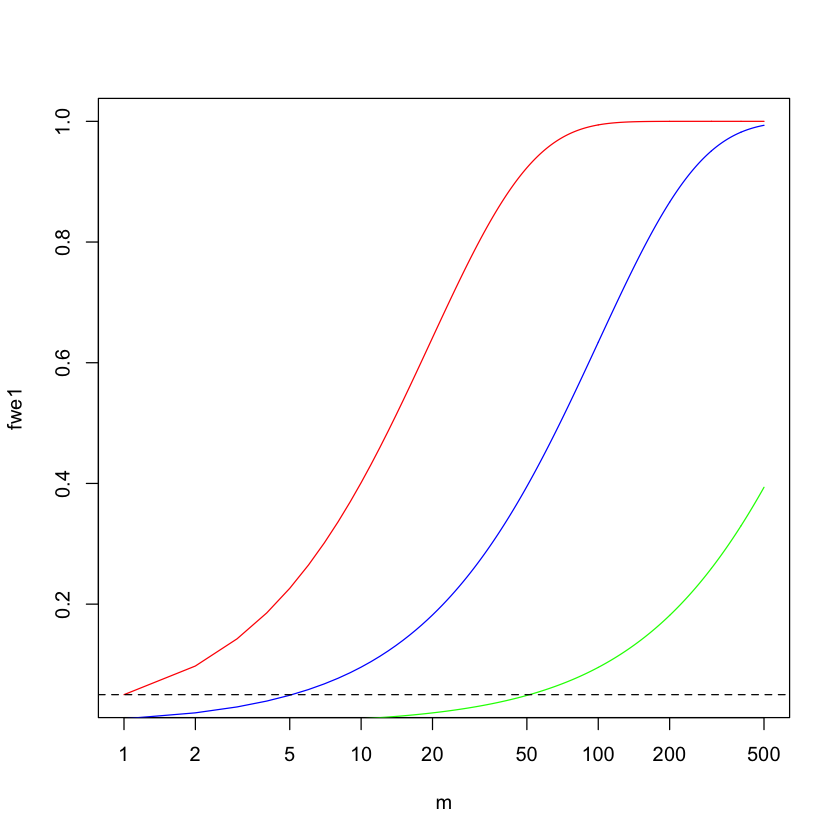

In [4]:
# FWER = prob making >= 1 false discoveries (type I errors) when performing multiple hypotheses tests
# family-wise error rate increases with number of hypothesis tests

m <- 1:500 # 500 hypothesis tests
fwe1 <- 1 - (1 - 0.05)^m # assumes tests independent
fwe2 <- 1 - (1 - 0.01)^m # assumes tests independent
fwe3 <- 1 - (1 - 0.001)^m # assumes tests independent

plot(m, fwe1, 
     log = 'x', 
     type = 'l', col = 'red')
lines(m, fwe2, col = 'blue')
lines(m, fwe3, col = 'green')
abline(h = 0.05, lty = 2) # p = 0.05 line

In [5]:
# fund manager data with p-value adjustuments (Bonferroni, Holm)

library(ISLR2)
head(Fund)
dim(Fund)

fund_mini <- Fund[, 1:5] # excess returns of first 5 fund managers

# t-test on fund_mini

fund_pvalue <- rep(0, 5)
for (i in 1:5)
    fund_pvalue[i] <- t.test(fund_mini[, i], mu = 0)$p.value
fund_pvalue

,Manager1,Manager2,Manager3,Manager4,Manager5,Manager6,Manager7,Manager8,Manager9,Manager10,⋯,Manager1991,Manager1992,Manager1993,Manager1994,Manager1995,Manager1996,Manager1997,Manager1998,Manager1999,Manager2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-3.341992,-4.167469,9.3892232,8.4172200,0.9978631,7.19147294,-10.767592,4.072425,1.5752640,-0.7985049,⋯,-2.948706,10.3507057,-2.855337,-4.431786,0.7395444,0.1980442,1.752188,-1.534710020,-3.35941947,6.585654
2,3.759627,12.525254,3.4033661,0.1439438,-7.2222267,0.06774724,-10.737053,-1.138185,-7.1666042,4.7785220,⋯,24.003150,-1.9666063,-1.609109,1.405325,4.7171753,1.5403588,-12.218233,-0.073007981,-8.54768280,-2.382629
3,12.970091,-2.581061,-0.8247344,6.5846037,17.0502407,1.85713004,3.196942,-7.981362,-1.2141483,2.3382497,⋯,-2.926914,6.4201465,8.946921,3.449013,1.0099572,1.4813686,14.203314,0.005561873,-5.10503528,2.292429
4,-4.874630,7.981743,-4.0267427,-4.7319458,0.5032760,0.74018702,-28.969410,4.683751,-0.5688399,-4.0005474,⋯,-3.112208,3.1735806,-6.017109,-1.984873,1.0225252,-2.2619275,19.345970,-1.048298976,-0.01615418,1.196832
5,2.019279,-5.370236,-4.8546690,10.5944317,-6.8915737,9.87783777,1.430033,9.840311,5.3114555,18.3650938,⋯,7.173653,-9.1572114,7.643125,-1.022339,-1.3258651,2.8487849,-6.642081,2.488611751,0.03206034,-7.510032
6,3.415439,-10.647755,16.5497974,-8.3342914,1.5335086,7.05093854,2.107857,3.701138,1.4900864,2.1990248,⋯,5.792461,0.5376722,-12.371356,1.930667,-3.9176861,-0.2428612,6.762622,-0.137822530,10.51039431,2.984115


[1]   50 2000

[1] 0.006202355 0.918271152 0.011600983 0.600539601 0.755781508

In [6]:
# adjustments (Bonferroni, Holm)

fund_pvalue
p.adjust(fund_pvalue, method = 'bonferroni')
p.adjust(fund_pvalue, method = 'holm')

[1] 0.006202355 0.918271152 0.011600983 0.600539601 0.755781508

[1] 0.03101178 1.00000000 0.05800491 1.00000000 1.00000000

[1] 0.03101178 1.00000000 0.04640393 1.00000000 1.00000000

- using the usual 0.05 p-value cutoff, conservative Bonferroni makes only 1 discovery compared to Holm's 2 discoveries

In [7]:
?p.adjust

p.adjust {stats},R Documentation
p,numeric vector of p-values (possibly with NAs). Any other R object is coerced by as.numeric.
method,correction method. Can be abbreviated.
n,"number of comparisons, must be at least length(p); only set this (to non-default) when you know what you are doing!"


In [8]:
# Benjamini & Hochberg aka False Discovery Rate (FDR)

fund_pvalues <- rep(0, 2000)

for (i in 1:2000)
    fund_pvalues[i] <- t.test(Fund[, i], mu = 0)$p.value

q_values_BH <- p.adjust(fund_pvalues, method = 'BH')

In [9]:
# how many fund managers would I pick (aka how many H0 rejections) if want FDR <= 10%?

round(q_values_BH[1:10], 2) # for FDR <= 0.1, would pick managers 1, 6-10 as having non-zero excess return

fb <- function(x){
    c(mean = mean(x), stdev = sd(x))
}

round(sapply(Fund[, 1:10], fb), 3) # includes managers with both positive AND negative excess return!

sum(q_values_BH < 0.1) # out of the 2000 managers, 146 have non-zero excess return with ~14.6 false positives

[1] 0.09 0.99 0.12 0.92 0.96 0.08 0.08 0.08 0.08 0.08

,Manager1,Manager2,Manager3,Manager4,Manager5,Manager6,Manager7,Manager8,Manager9,Manager10
mean,3.000,-0.100,2.80,0.500,0.300,4.034,-3.894,-3.198,1.619,3.740
stdev,7.416,6.856,7.55,6.708,6.782,8.122,9.284,6.675,3.608,8.401


[1] 146

In [10]:
# compare to Bonferroni

p_values_bonf <- p.adjust(fund_pvalues, method = 'bonferroni')
sum(p_values_bonf <= 0.05) # conservative Bonferroni fails to reject ANY H0
sum(fund_pvalues <= 0.05/2000) # equivalent to above

[1] 0

[1] 0

In [11]:
# own implementation of Benjamini-Hochberg

ps <- sort(fund_pvalues)
m <- length(fund_pvalues)
q0 <- 0.1

wh_ps <- which(ps < q0 * (1:m)/m) # indices of p values less than q0 * (1:m)/m
wh_ps

if (length(wh_ps) > 0){
    wh <- 1:max(wh_ps)
} else {
    wh <- numeric(0)
}

[1]  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
[20]  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
[39]  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[58] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
[77] 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146

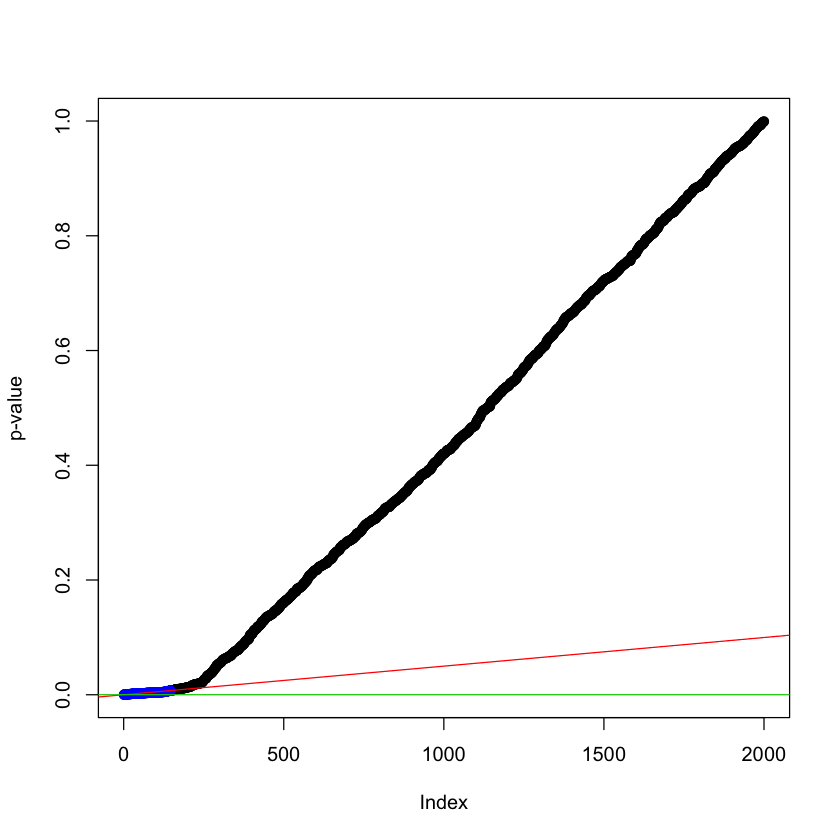

In [12]:
# plotting the result

plot(ps, 
    xlab = 'Index', ylab = 'p-value')
points(wh, ps[wh], 
      col = 4)
abline(a = 0, b = q0/m, 
      col = 2)
abline(h = 0.1/2000, 
       col = 3) # Bonferroni line

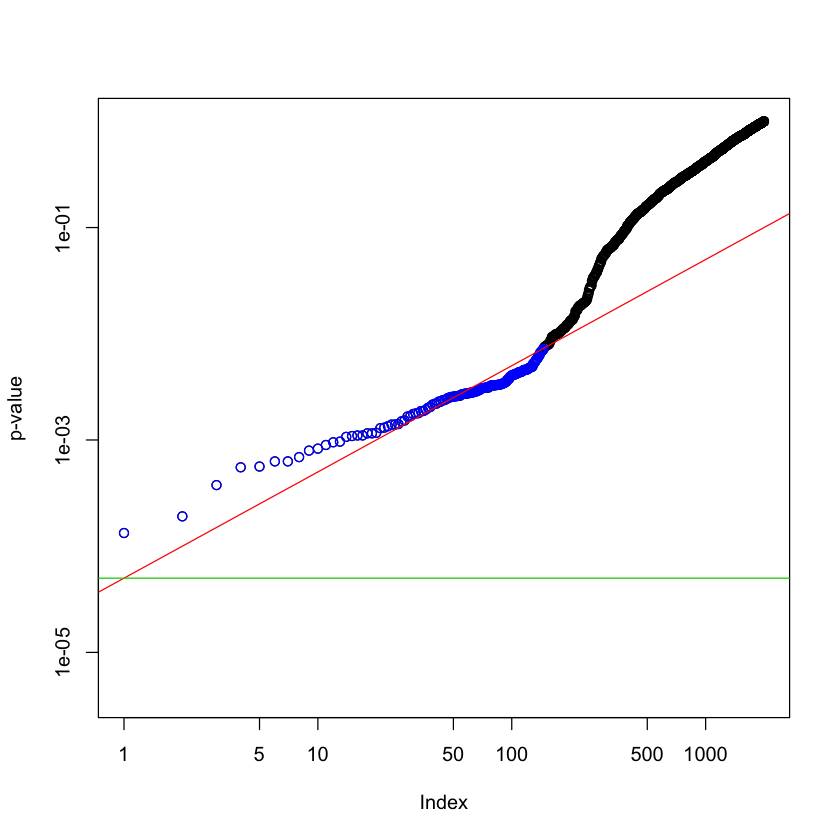

In [13]:
# zoom in
# plotting the result

plot(ps, 
     log = 'xy', 
     ylim = c(4e-6, 1),
    xlab = 'Index', ylab = 'p-value')
points(wh, ps[wh], 
      col = 4)
abline(a = 0, b = q0/m, 
      col = 2, 
      untf = TRUE)
abline(h = 0.1/2000, 
       col = 3) # Bonferroni line


In [14]:
# Resampling approach

library(ISLR2)

str(Khan)

x <- rbind(Khan$xtrain, Khan$xtest)
y <- c(Khan$ytrain, Khan$ytest)

dim(x)
table(y)

List of 4
 $ xtrain: num [1:63, 1:2308] 0.7733 -0.0782 -0.0845 0.9656 0.0757 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:63] "V1" "V2" "V3" "V4" ...
  .. ..$ : NULL
 $ xtest : num [1:20, 1:2308] 0.14 1.164 0.841 0.685 -1.956 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:20] "V1" "V2" "V4" "V6" ...
  .. ..$ : NULL
 $ ytrain: num [1:63] 2 2 2 2 2 2 2 2 2 2 ...
 $ ytest : num [1:20] 3 2 4 2 1 3 4 2 3 1 ...


[1]   83 2308

y
 1  2  3  4 
11 29 18 25 

In [15]:
?Khan

Khan {ISLR2},R Documentation


In [16]:
# compare class 2 and class 4

x1 <- x[which(y == 2), ]
x2 <- x[which(y == 4), ]

